In [2]:
import pandas as pd
import numpy as np

In [ ]:
Healthcare is an important industry which offers value-based care to millions of people, while at the same time becoming top revenue earners for many countries. 
Today, the Healthcare industry in the US alone earns a revenue of $1.668 trillion. 
The US also spends more on healthcare per capita as compared to most other developed or developing nations.
There are several AI applicaitons available for different domain of healthcare such as...
AI application to Identify Diseases and Diagnosis.
Medical Imaging Diagnosis
Smart Health Records
Clinical health
Radiotherapy etc.

I am trying to find results from Doctor fee data across different cities in India. 
As we know that healthcare industry has several domains and it is seldome to get the actual data but for educational purpose, i am getting this data from UCI machine learning repository and with the help of this data we can build a model to analyse doctor fee across different cities as per their specialization.


In [92]:
train=pd.read_excel('Final_Train.xlsx')

In [4]:
#now lets start preparing data..

In [5]:
df['Experience'] = df['Experience'].str.split(" ").str[0]

In [7]:
df['Experience']= df['Experience'].astype(int)

In [9]:
df['Place'].fillna("Unknown,Unknown", inplace= True)

In [10]:
df['City']=df['Place'].str.split(",").str[-1]

In [11]:
df['Place']=df['Place'].str.split(',').str[0]

In [13]:
# now lets try to simplify the data in Rating column

In [18]:
## Extract relevant qualification

df['Qualification']=df['Qualification'].str.split(",")
Qualification = {}  # dictionary : dictionary has key and values, hence as expample BHMS is a key and 749 is its values.

for x in df['Qualification'].values:  # 1 by 1 every value will be saving into x
    for each in x:     # BAMS going into each(variable) then, MD - Homeopathy' will go into each and so on..
        each = each.strip()   # strip will remove the spaces 
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1


     

In [21]:
most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
# this code will take top 10 most used term which starts with 1th position in Qualification items..

In [23]:
#most_qua= sorted(Qualification.items(), key= lambda x:x[1], reverse=True)[:10]
#used lambda to put condition in qualification items and reverse is used to start from biggest number value item.

In [25]:
final_qua =[]
for tup in most_qua:    # tup is a variable just defined here.. it will save the value: MBBS , as final_qua is appending with tup[0]
    final_qua.append(tup[0])

In [31]:
df.drop(['Qualification'], inplace=True, axis=1)

In [33]:
df.drop(['Miscellaneous_Info'], inplace=True, axis=1)

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le = LabelEncoder()

In [67]:
df['Place']= le.fit_transform(df['Place'])

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
# now we will see the graphical representations among diffrent entities using plots...
#Box Plot
#Bar plot
#Count plot



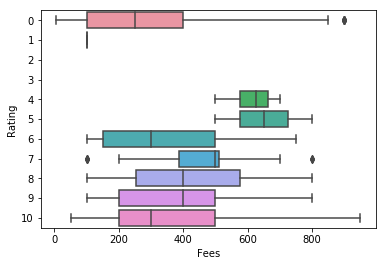

In [76]:
sns.boxplot(df['Fees'], df['Rating'])
plt.show()

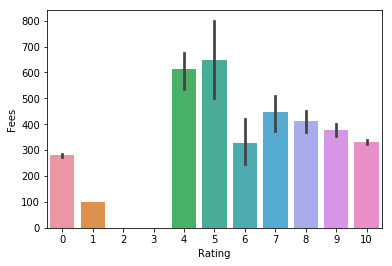

In [79]:
sns.barplot(df['Rating'], df['Fees'])
plt.show()

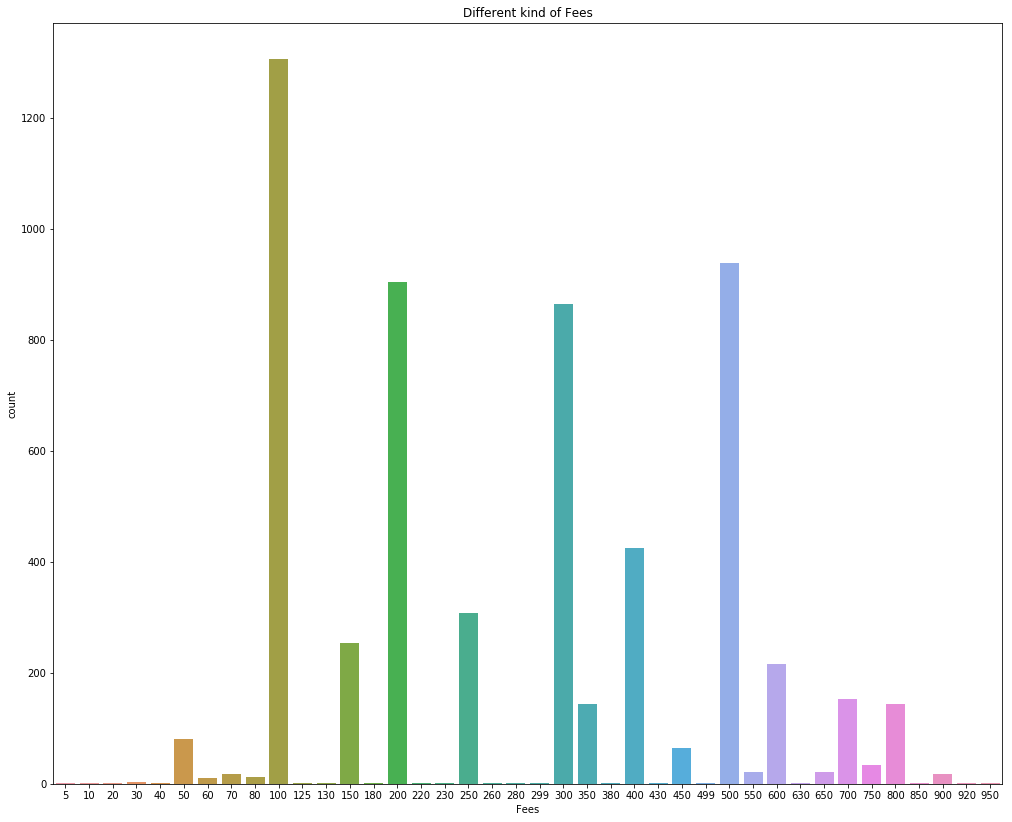

In [85]:
plt.figure(figsize=(17,14))
sns.countplot(x='Fees', data=df)
plt.title('Different kind of Fees')
plt.show()

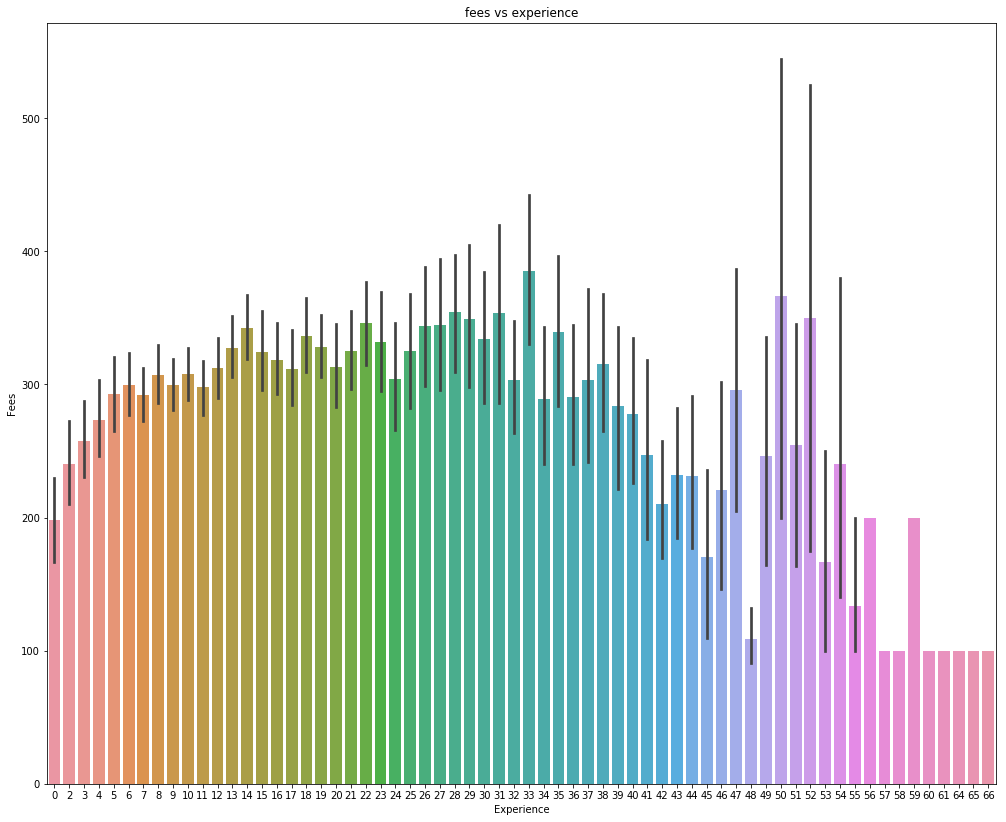

In [83]:
plt.figure(figsize=(17,14))
sns.barplot(df['Experience'], df['Fees'])
plt.title('fees vs experience')
plt.show()

In [103]:
#x = df.drop('Fees', inplace=True, axis=1)

x= df.copy()

In [96]:
y= train.Fees

In [97]:
y.shape

(5961,)

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#now i am using Random Forest regressor and test train and split method to build the model.

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.25, random_state=47)


In [106]:
rfr = RandomForestRegressor()

In [115]:
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [121]:
# GridSearch CV
from sklearn.model_selection import cross_val_score

cvscore= cross_val_score(rfr, x, y, cv=10)



In [125]:
import pickle   # saving model..
saved_model = pickle.dumps(rfr)

In [128]:
load_model=pickle.loads(saved_model)


In [ ]:
#hence we can see r2_score, mean_squared_error value.. 
#this model is fitting and working.

In [ ]:
#here we can conculde that AI and ML is helping in building an algorithm by the help of available data, 
#which is helping in predicting future cases.
#Our Conculsions...
#1 We can see that the doctors charging fee 100/ patient are getting higher numbers of counts.
#2 Doctors charging fee more than 500/ patients are getting less patients.
#3 Doctors charging fee 500 are getting patints between 800-1000.
